In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data file reading 

def collect_data (n, interaction): # n is the number of files

    files = [];
    raw_data = [];
    data = [];

    for i in range (0, n, 1):

        files.append (open ("data"+ str (i) + "-" + interaction + ".txt","r"));
        raw_data.append (files[i].readlines());

        arr = [];
        
        for line in raw_data[i]:

            
            dat = line.split();

            if (len (dat) == 0):
                break;
                
            arr.append (float (dat[0]));

        data.append (arr);

    return data;

In [3]:
# Statistics 

def stats (arr):

    # Mean

    mu = 0;
    
    for i in range (30, len(arr), 1):
        mu = mu + arr[i];
        
    mu = mu / (len (arr)-30);

    sigma = 0;
    
    for i in range (30, len(arr), 1):
        sigma = sigma + pow (arr[i] - mu, 2);

    sigma = np.sqrt(sigma / (len (arr)-30));

    return [mu, sigma]

In [4]:
# a = 25 data collection

n = 7;

data25 = collect_data (n, "25");

# a = 75 data collection

data75 = collect_data (n, "75");

In [5]:
# Means and standard deviations

mu25 = [];
sigma25 = [];

mu75 = [];
sigma75 = [];

for i in range (0, n, 1):
    
    mui25, sigmai25  = stats (data25[i]);
    mui75, sigmai75  = stats (data75[i]);

    mu25.append (mui25 -1);
    sigma25.append (sigmai25);

    mu75.append (mui75 -1);
    sigma75.append (sigmai75);

In [6]:
print (mu25)

[0.003634608028169062, -0.003226013098591718, 0.007553543521126693, 0.008358970422535306, 0.03932382633802822, 0.11409356197183085, 0.2220056704225355]


In [7]:
print (sigma25)

[0.03469726305101668, 0.025026162788468677, 0.019790820628753522, 0.022425889520283505, 0.02172007871585472, 0.020639403264079266, 0.029434854962027652]


In [8]:
print (mu75)

[0.14170290676056396, 0.010216065633802618, 0.0026288873239437294, 0.00964790985915509, 0.09457700704225336, 0.1761142577464787, 0.3595408140845071]


In [9]:
print (sigma75)

[0.1289996751408184, 0.024493262306942362, 0.018575934652350145, 0.021835364023154214, 0.022633833079011206, 0.025373732848670085, 0.027328600261822877]


In [10]:
# time step array

dt_arr25 = [0.001, 0.005, 0.008, 0.01, 0.05, 0.08, 0.1];
dt_arr75 = [0.001, 0.005, 0.008, 0.01, 0.05, 0.06, 0.07];

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
/var/folders/7z/6sny2vy960992wnrq442m5nm0000gn/T/ipykernel_98422/1367302401.py:2: SyntaxWarning: invalid escape sequence '\D'
  ax.set_xlabel("$\Delta t$");


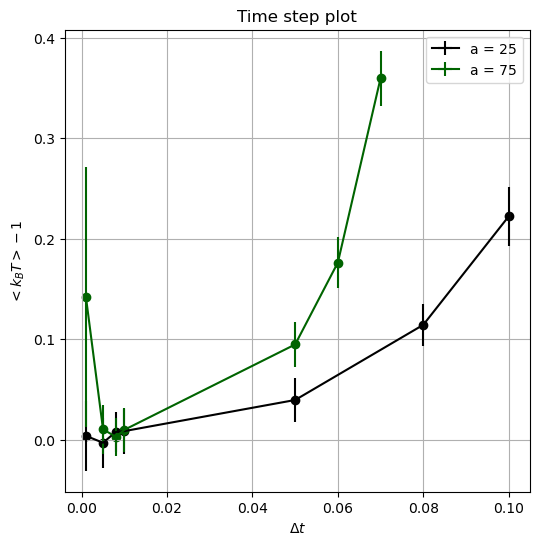

In [11]:
fig, ax = plt.subplots(1,1,figsize=[6,6]);
ax.set_xlabel("$\Delta t$");
ax.set_ylabel("$<k_{B}T> - 1$");
ax.set_title("Time step plot");
#ax.set_xlim([0, 4]);
#ax.set_ylim([-1, 2]);

ax.errorbar (dt_arr25, mu25, xerr = 0, yerr = sigma25, color = "black", label = "a = 25");
ax.errorbar (dt_arr75, mu75, xerr = 0, yerr = sigma75, color = "darkgreen", label = "a = 75");
ax.scatter (dt_arr25, mu25, color = "black");
ax.scatter (dt_arr75, mu75, color = "darkgreen")
    
ax.grid();
ax.legend(loc = "upper right");
plt.show(fig);

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
/var/folders/7z/6sny2vy960992wnrq442m5nm0000gn/T/ipykernel_98422/3973342356.py:2: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_xlabel("$\Delta t$");


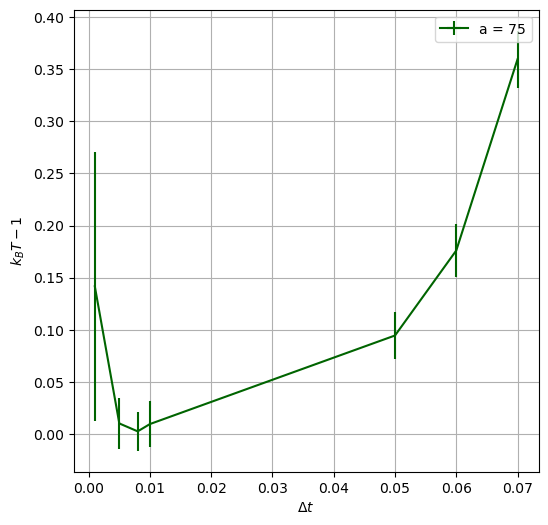

In [12]:
fig1, ax1 = plt.subplots(1,1,figsize=[6,6]);
ax1.set_xlabel("$\Delta t$");
ax1.set_ylabel("$k_{B}T - 1$");
ax1.set_title("");
#ax.set_xlim([0, 4]);
#ax.set_ylim([-1, 2]);

ax1.errorbar (dt_arr75, mu75, xerr = 0, yerr = sigma75, color = "darkgreen", label = "a = 75");
    
    
ax1.grid();
ax1.legend(loc = "upper right");
plt.show(fig1);